In [1]:
#visualize testing data TuSimple
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

color_map = {
    0: [0,0,0], #black
    1: [255, 0, 0],  # Blue
    2: [0, 255, 0],  # Green
    3: [0, 0, 255],  # Red
    4: [0, 255, 255]  # Yellow
}

def gt_preprocess(gt_h, gt_lanes):
    coor_list = []
    for lane in gt_lanes:
        coordinates = list(zip(lane, gt_h))
        coor_list.append(coordinates)
    return coor_list

# change accordingly
gt_parent = "/home/automan/wuguanjie/TuSimple/train/test_label_new.json"
saving_file_path = "/home/automan/wuguanjie/exp_TU1_Segformer_mitb0_tensorboard"
pred_parent = "/home/automan/wuguanjie/SCNN_Pytorch/experiments/exp_TU1_Segformer_mitb0_tensorboard/coord_output"
im_parent = "/home/automan/wuguanjie/TuSimple/test/clips"

count = 0

with open(gt_parent) as f:
    lines = f.readlines()
    for line in lines:
        gt_data = json.loads(line)
        gt_path = gt_data["raw_file"]
        path_tail = gt_path.split(os.path.sep)[-3:-1]
        im_path = os.path.join(im_parent,*path_tail,"20.jpg")
        pred_img = cv2.imread(im_path)
        gt_img = pred_img.copy()
        gt_h = gt_data["h_samples"]
        gt_lanes = gt_data["lanes"]
        lane_idx = gt_data["lane_idx"]
        gt_coor = gt_preprocess(gt_h, gt_lanes)
        for i in range(len(gt_coor)):
            coordinates = gt_coor[i]
            lane_color = lane_idx[i]
            colour = color_map[lane_color]
            for idx in range(len(coordinates)):
                if (idx+1) < len(coordinates):
                    current_x, current_y = coordinates[idx][0],coordinates[idx][1]
                    next_x, next_y = coordinates[idx+1][0],coordinates[idx+1][1]
                    if current_x == -2 or next_x == -2:
                        continue
                    else: 
                        cv2.line(gt_img, (current_x,current_y), (next_x,next_y) , colour, 3)

        pred_file = os.path.join(pred_parent, *path_tail,"20.lines.txt")
        with open (pred_file) as f:
            lines = f.readlines()
            lane_idx = lines[-1].split(" ")
            for line, lane_color in iter(zip(lines[:-1],lane_idx)):
                colour = color_map[int(lane_color)]
                coordinates = iter(line.split(" "))
                coordinates = list(zip(coordinates, coordinates))
                coordinates = np.array(coordinates,dtype =np.float).astype(int)

                for x,y in coordinates:
                    for idx in range(len(coordinates)):
                        if (idx+1) < len(coordinates):
                            current_x, current_y = coordinates[idx][0],coordinates[idx][1]
                            next_x, next_y = coordinates[idx+1][0],coordinates[idx+1][1]
                            if current_x == -1 or next_x == -1:
                                continue
                            else: 
                                cv2.line(pred_img, (current_x,current_y), (next_x,next_y) , colour, 3)
        vis = np.concatenate((pred_img, gt_img), axis=1)
        if not os.path.exists(saving_file_path):
            os.makedirs(saving_file_path)
        saving_path = os.path.join(saving_file_path, str(path_tail[-1])+".jpg")
        cv2.imwrite(saving_path, vis)
        # count += 1
        # if count == 3:
        #     break

In [3]:
#visualising training data
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

color_map = {
    0: [0,0,0], #black
    1: [255, 0, 0],  # Blue
    2: [0, 255, 0],  # Green
    3: [0, 0, 255],  # Red
    4: [0, 255, 255]  # Yellow
}

def gt_preprocess(gt_h, gt_lanes):
    coor_list = []
    for lane in gt_lanes:
        coordinates = list(zip(lane, gt_h))
        coor_list.append(coordinates)
    return coor_list


gt_parent = "/home/automan/wuguanjie/TuSimple/train/label_data_0601_new.json"
saving_file_path = "/home/automan/wuguanjie/TuSimpleTrainingVis"
im_parent = "/home/automan/wuguanjie/TuSimple/train"
count =0
with open(gt_parent) as f:
    lines = f.readlines()
    for line in lines:
        gt_data = json.loads(line)
        count+=1
        gt_path = gt_data["raw_file"]
        im_path = os.path.join(im_parent,gt_path)
        path_tail = gt_path.split(os.path.sep)[-3:-1]
        pred_img = cv2.imread(im_path)
        gt_img = pred_img.copy()
        gt_h = gt_data["h_samples"]
        gt_lanes = gt_data["lanes"]
        lane_idx = gt_data["lane_idx"]
        gt_coor = gt_preprocess(gt_h, gt_lanes)
        colours = [(255,0,0), (0,255,0), (255,0,255),(255,255,0), (128,0,128) ]
        colour_index = 0
        for i in range(len(gt_coor)):
            coordinates = gt_coor[i]
            lane_color = lane_idx[i]
            colour = color_map[lane_color]
            for idx in range(len(coordinates)):
                if (idx+1) < len(coordinates):
                    current_x, current_y = coordinates[idx][0],coordinates[idx][1]
                    next_x, next_y = coordinates[idx+1][0],coordinates[idx+1][1]
                    if current_x == -2 or next_x == -2:
                        continue
                    else: 
                        cv2.line(gt_img, (current_x,current_y), (next_x,next_y) , colour, 3)
            colour_index += 1
        colour_index = 0
        if not os.path.exists(saving_file_path):
            os.makedirs(saving_file_path)
        saving_path = os.path.join(saving_file_path,path_tail[0]+"_"+path_tail[1]+"_"+"20.jpg")
        cv2.imwrite(saving_path, gt_img)
        # if count == 1:
        #     break
        

In [1]:
# visualizing CuLane testing data
import glob
import os
import cv2
import numpy as np

color_map = {
    0: [0,0,0], #black
    1: [255, 0, 0],  # Blue
    2: [0, 255, 0],  # Green
    3: [0, 0, 255],  # Red
    4: [0, 255, 255]  # Yellow
}

def check_lane_idx(coor_list):
    slope = []

    #calculate slope
    for i in range(len(coor_list)):
        coor = coor_list[i]
        slope.append(np.arctan2(coor[0][1] - coor[-1][1], coor[-1][0] - coor[0][0])/ np.pi* 180)
    coor_list = [coor_list[i] for i in np.argsort(slope)]
    slope = [slope[i] for i in np.argsort(slope)]
    #create new coor_list
    new_coor_list = []
    idx_list = [None, None, None, None]
    for i in range(len(slope)):
        if slope[i] <= 90:
            idx_list[1] = i
            idx_list[0] = i - 1 if i > 0 else None
        else:
            idx_list[2] = i
            idx_list[3] = i + 1 if i + 1 < len(slope) else None
            break
    new_idx_list = []
    for i in range(len(idx_list)):
        idx = idx_list[i]
        if idx is not None:
            new_coor_list.append(coor_list[idx])
            new_idx_list.append(i+1)
    return new_coor_list, new_idx_list

gt_parent = "/home/automan/wuguanjie/CULane_path"
pred_parent = "/home/automan/wuguanjie/SCNN_Pytorch/experiments/exp_CL1_Segformer_tensorboard/coord_output"
saving_path = "/home/automan/wuguanjie/CuLaneTestVis"

test_folder_list = glob.glob(os.path.join(pred_parent, "*"))
for driver_folder in test_folder_list:
    driver_folder_name = os.path.basename(driver_folder)
    full_driver_folder_name = os.path.join(pred_parent, driver_folder_name)
    timestamp_folder_list = glob.glob(os.path.join(full_driver_folder_name,"*"))
    for timestamp_folder in timestamp_folder_list:
        frame_file_list = glob.glob(os.path.join(timestamp_folder, "*"))
        frame_file_list.sort()
        for frame_file in frame_file_list:
            frame_txt_name = os.path.basename(frame_file)
            frame_num = frame_txt_name.split(".")[0]
            timestamp = os.path.basename(timestamp_folder)
            gt_im_path = os.path.join(gt_parent, driver_folder_name, timestamp, frame_num +".jpg")
            gt_data_path = os.path.join(gt_parent, driver_folder_name, timestamp, frame_txt_name)
            pred_data_path = frame_file
            saving_folder_path = os.path.join(saving_path, driver_folder_name, timestamp)
            if not os.path.exists(saving_folder_path):
                os.makedirs(saving_folder_path)
            saving_file_path = os.path.join(saving_folder_path, frame_num + ".jpg")
            #reading image
            im = cv2.imread(gt_im_path)
            # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            pred_im = im
            gt_im = im.copy()

            # reading gt data and pred data
            with open(pred_data_path, "r") as pred_f:
                pred_data = pred_f.readlines()
            with open(gt_data_path, "r") as gt_f:
                gt_data = gt_f.readlines()

            #data preprocessing
            gt_coords_list = []
            for l in gt_data:
                tmp_data = l.split()
                tmp_coords = []
                for idx in range(0, len(tmp_data), 2):
                    tmp_coords.append([int(float(tmp_data[idx])), int(tmp_data[idx + 1])])
                gt_coords_list.append(tmp_coords)

            pred_coords_list = []
            for l in pred_data:
                tmp_data = l.split()
                tmp_coords = []
                for idx in range(0, len(tmp_data), 2):
                    tmp_coords.append([int(float(tmp_data[idx])), int(tmp_data[idx + 1])])
                pred_coords_list.append(tmp_coords)
            
            # plotting data on image
            new_gt_coords_list, gt_idx_list = check_lane_idx(gt_coords_list)
            new_pred_coords_list, pred_idx_list = check_lane_idx(pred_coords_list)
            for i in range(len(new_gt_coords_list)):
                gt_coords = new_gt_coords_list[i]
                lane_idx = gt_idx_list[i]
                colour = color_map[lane_idx]
                for idx, (x, y) in enumerate(gt_coords):
                    if idx+1 < len(gt_coords):
                        sp = gt_coords[idx]
                        ep = gt_coords[idx+1]
                        cv2.line(gt_im, sp, ep, colour, 3)

            for i in range(len(new_pred_coords_list)):
                pred_coords = new_pred_coords_list[i]
                lane_idx = pred_idx_list[i]
                colour = color_map[lane_idx]
                for idx, (x, y) in enumerate(pred_coords):
                    if idx+1 < len(pred_coords):
                        sp = pred_coords[idx]
                        ep = pred_coords[idx+1]
                        cv2.line(pred_im, sp, ep, colour, 3)

            vis = np.concatenate((pred_im, gt_im), axis=1)
            cv2.imwrite(saving_file_path, vis)

/home/automan/wuguanjie/CULane_path/driver_193_90frame/06050845_0587.MP4/00000.jpg


NameError: name 'np' is not defined

In [ ]:
# visualize the output from combined_dataloader to make sure that the output is correct
import torch
import matplotlib.pyplot as plt
from utils.transforms import *
import dataset
from torch.utils.data import DataLoader

# Define your data transformation
resize_shape = (512,288)
dataset_name = "combined"
mean = (0.3598, 0.3653, 0.3662)
std = (0.2573, 0.2663, 0.2756)

# mean = (0.485, 0.456, 0.406)
# std = (0.229, 0.224, 0.225)
transform_train = Compose(
    Resize(resize_shape, dataset_name),
    # ColorJitter(),
    RandomFlip(),
    Rotation(2),
    ToTensor(),
    Normalize(mean=mean, std=std),
)

train_dataset = dataset.combined_dataloader(
    "/home/automan/wuguanjie/SCNN_Pytorch/dataset/combined_train_gt.txt",
    "train",
    "combined",
    transform_train,
)

# Load your data using a DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=train_dataset.collate,
    num_workers=8,
)

# Get a batch of data samples
for batch_idx, sample in enumerate(train_loader):
    img = sample["img"]
    segLabel = sample["segLabel"]
    # Plot the transformed images
    for j in range(img.shape[0]):
        loaded_img = img[j].permute(1, 2, 0)
        # loaded_img = cv2.cvtColor(loaded_img.numpy(), cv2.COLOR_BGR2RGB)
        gt = segLabel[j]
        plt.imshow(gt)
        plt.show()
        plt.imshow(loaded_img)
        plt.show()
    # Stop after a certain number of batches
    if batch_idx == 1:
        break


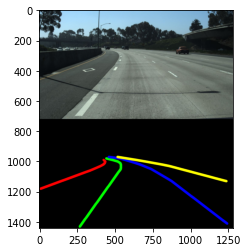

In [2]:
# visualising the training semantic map
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read the file
#CULane
# img_path = "/home/automan/wuguanjie/CULane_path/driver_23_30frame/05151652_0423.MP4/00630.jpg"
# gt_path = "/home/automan/wuguanjie/CULane_path/laneseg_label_w16/driver_23_30frame/05151652_0423.MP4/00630.png"
#TuSimple
img_path = "/home/automan/wuguanjie/TuSimple/train/clips/0313-1/19080/20.jpg"
gt_path = "/home/automan/wuguanjie/TuSimple/train/seg_label/0313-1/19080/20.png"
semantic_map = cv2.imread(gt_path)[:,:,0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Define color map
color_map = {
    0: [0,0,0], #black
    1: [255, 0, 0],  # Red
    2: [0, 255, 0],  # Green
    3: [0, 0, 255],  # Blue
    4: [255, 255, 0]  # Yellow
}

# Create example semantic map with 4 classes
# semantic_map = np.random.randint(4, size=(256, 256))

# Convert semantic map to color image using color map
color_semantic_map = np.zeros((semantic_map.shape[0], semantic_map.shape[1], 3), dtype=np.uint8)
# cv2.circle(img,(444,260),radius = 50, color = (255,255,255),thickness=-1) #269,710 710-260, 444-269
for label in color_map:
    color_semantic_map[semantic_map == label] = color_map[label]
combined_img = np.vstack((img, color_semantic_map))
plt.imshow(combined_img)

In [ ]:
# visualising how to categorise ego lane, left & right lane
label = {"lanes": [[-2, -2, 444, 485, 519, 535, 540, 540, 540, 539, 532, 524, 517, 510, 503, 496, 489, 482, 475, 468, 461, 453, 446, 439, 432, 425, 418, 411, 404, 397, 390, 383, 375, 368, 361, 354, 347, 340, 333, 326, 319, 312, 304, 297, 290, 283, 276, 269], [-2, 460, 536, 569, 603, 636, 666, 691, 715, 740, 757, 774, 791, 808, 825, 842, 859, 875, 888, 901, 914, 927, 940, 953, 966, 979, 992, 1005, 1019, 1032, 1045, 1058, 1071, 1084, 1097, 1110, 1123, 1136, 1149, 1162, 1175, 1188, 1201, 1214, 1228, 1241, -2, -2], [-2, -2, -2, 426, 437, 434, 424, 406, 383, 360, 336, 308, 281, 254, 227, 200, 173, 145, 118, 91, 64, 37, 10, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, 518, 580, 642, 700, 755, 810, 859, 897, 934, 972, 1010, 1047, 1085, 1123, 1160, 1198, 1236, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]], "h_samples": [240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710], "raw_file": "clips/0313-1/19080/20.jpg"}

# ---------- clean and sort lanes -------------
lanes = []
_lanes = []
slope = []  # identify 1st, 2nd, 3rd, 4th lane through slope
for i in range(len(label["lanes"])):
    l = [
        (x, y)
        for x, y in zip(label["lanes"][i], label["h_samples"])
        if x >= 0
    ]
    if len(l) > 1:
        _lanes.append(l)
        print("l[-1][1]", l[-1][1])
        print("l[0][1]", l[0][1])
        print("l[0][0]",l[0][0])
        print("l[-1][0]",l[-1][0])
        slope.append(
            np.arctan2(l[-1][1] - l[0][1], l[0][0] - l[-1][0])
            / np.pi
            * 180
        )

_lanes = [_lanes[i] for i in np.argsort(slope)]
slope = [slope[i] for i in np.argsort(slope)]

idx_1 = None
idx_2 = None
idx_3 = None
idx_4 = None
for i in range(len(slope)):
    if slope[i] <= 90:
        idx_2 = i
        idx_1 = i - 1 if i > 0 else None
    else:
        idx_3 = i
        idx_4 = i + 1 if i + 1 < len(slope) else None
        break
lanes.append([] if idx_1 is None else _lanes[idx_1])
lanes.append([] if idx_2 is None else _lanes[idx_2])
lanes.append([] if idx_3 is None else _lanes[idx_3])
lanes.append([] if idx_4 is None else _lanes[idx_4])

In [2]:
# visualising segmantic map
from utils.transforms import *
from model_segformer import segformer
import json
import cv2
import torch
from torchvision.transforms import Normalize as Normalize_th
import matplotlib.pyplot as plt
import torch.nn.functional as F
from utils.prob2lines import getLane

with open("/home/automan/wuguanjie/SCNN_Pytorch/experiments/exp_TU1_Segformer_mitb0_tensorboard/cfg.json") as f:
    exp_cfg = json.load(f)
model_config = exp_cfg['MODEL_CONFIG']
model = segformer(model_config, pretrained=True)
save_name = "/home/automan/wuguanjie/SCNN_Pytorch/experiments/exp_TU1_Segformer_mitb0_tensorboard/exp_TU1_Segformer_mitb0_tensorboard_best.pth"
save_dict = torch.load(save_name, map_location='cpu')
model.load_state_dict(save_dict['net'])
model = model.to('cuda:2')
model.eval()
#resize
pred_img = cv2.imread("/home/automan/wuguanjie/TuSimple/train/clips/0531/1492638208126576446/20.jpg")
print(pred_img.shape)
pred_img = cv2.resize(pred_img,(512,288))

#to tensor
pred_img = pred_img.transpose(2, 0, 1)
pred_img = torch.from_numpy(pred_img).type(torch.float) / 255.

#normalization
mean=(0.485, 0.456, 0.406)
std=(0.229, 0.224, 0.225)
transform = Normalize_th(mean, std)
pred_img = transform(pred_img)
pred_img = torch.unsqueeze(pred_img, 0)
pred_img = pred_img.to('cuda:2')
output = model(pred_img)
seg_pred = F.softmax(output[0], dim=1)
seg_pred = torch.squeeze(seg_pred, 0)
seg_pred = seg_pred.detach().cpu().numpy()
exist_pred = output[1].detach().cpu().numpy()[0]
# seg_pred = np.ascontiguousarray(np.transpose(seg_pred, (1, 2, 0)))
exist = [1 if exist_pred[i] > 0.1 else 0 for i in range(len(exist_pred))]
print(exist)
lane_coords = getLane.prob2lines_tusimple(seg_pred, exist, resize_shape=(720,1280),y_px_gap=10, pts = 56)
print(len(lane_coords))
for i in range(len(lane_coords)):
    lane_coords = sorted(lane_coords, key= lambda pair:pair[1])
print(len(lane_coords))

(720, 1280, 3)
[1, 1, 1, 1]
4
4


In [27]:
# visualising the training semantic map
import numpy as np
import cv2
import matplotlib.pyplot as plt

color_map = {
    0: [0,0,0], #black
    1: [255, 255, 255],  # white
}

tmp_seg_pred = np.ascontiguousarray(np.transpose(seg_pred, (1, 2, 0)))

for i in range(5):
    semantic_map = tmp_seg_pred[:,:,i]
    semantic_map = semantic_map > 0.3
    color_semantic_map = np.zeros((semantic_map.shape[0], semantic_map.shape[1], 3), dtype=np.uint8)
    for label in color_map:
        color_semantic_map[semantic_map == label] = color_map[label]
    saving_path = "/home/automan/wuguanjie/report_vis/{}.jpg".format(str(i))
    cv2.imwrite(saving_path,color_semantic_map)